In [1]:
1

1

In [2]:
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np
import plotnine as p9
import scanpy as sc
import squidpy as sq
import tiledb
import tiledbsoma
from anndata import AnnData
import matplotlib.pyplot as plt
import anndata
import glob
import shutil

In [2]:
import random
random.seed(2023)

In [3]:
!mkdir "data/cosMx_human_liver/region_fov"

mkdir: cannot create directory ‘data/cosMx_human_liver/region_fov’: File exists


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
adata = sc.read("data/cosMx_human_liver/LiverDataReleaseSeurat_newUMAP.h5ad")
adata

AnnData object with n_obs × n_vars = 793318 × 1000
    obs: 'RNA_pca_cluster_default', 'RNA_pca_cluster_default.1', 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'nCount_negprobes', 'nFeature_negprobes', 'nCount_falsecode', 'nFeature_falsecode', 'fov', 'Area', 'AspectRatio', 'Width', 'Height', 'Mean.PanCK', 'Max.PanCK', 'Mean.CK8.18', 'Max.CK8.18', 'Mean.Membrane', 'Max.Membrane', 'Mean.CD45', 'Max.CD45', 'Mean.DAPI', 'Max.DAPI', 'cell_id', 'assay_type', 'Run_name', 'slide_ID_numeric', 'Run_Tissue_name', 'Panel', 'Mean.Yellow', 'Max.Yellow', 'Mean.CD298_B2M', 'Max.CD298_B2M', 'cell_ID', 'x_FOV_px', 'y_FOV_px', 'x_slide_mm', 'y_slide_mm', 'propNegative', 'complexity', 'errorCtEstimate', 'percOfDataFromError', 'qcFlagsRNACounts', 'qcFlagsCellCounts', 'qcFlagsCellPropNeg', 'qcFlagsCellComplex', 'qcFlagsCellArea', 'median_negprobes', 'negprobes_quantile_0.9', 'median_RNA', 'RNA_quantile_0.9', 'nCell', 'nCount', 'nCountPerCell', 'nFeaturePerCell', 'propNegativeCellAvg', 'complexityCellAvg', '

In [6]:
tab = adata.obs.groupby("fov")[["x_FOV_px", "y_FOV_px"]].agg(max)
tab.columns = [f"{c}_max" for c in tab.columns]
tab = tab.reset_index()
tab = tab.merge(adata.obs)
tab.head()

,fov,x_FOV_px_max,y_FOV_px_max,RNA_pca_cluster_default,RNA_pca_cluster_default.1,orig.ident,nCount_RNA,nFeature_RNA,nCount_negprobes,nFeature_negprobes,nCount_falsecode,nFeature_falsecode,Area,AspectRatio,Width,Height,Mean.PanCK,Max.PanCK,Mean.CK8.18,Max.CK8.18,Mean.Membrane,Max.Membrane,Mean.CD45,Max.CD45,Mean.DAPI,Max.DAPI,cell_id,assay_type,Run_name,slide_ID_numeric,Run_Tissue_name,Panel,Mean.Yellow,Max.Yellow,Mean.CD298_B2M,Max.CD298_B2M,cell_ID,x_FOV_px,y_FOV_px,x_slide_mm,y_slide_mm,propNegative,complexity,errorCtEstimate,percOfDataFromError,qcFlagsRNACounts,qcFlagsCellCounts,qcFlagsCellPropNeg,qcFlagsCellComplex,qcFlagsCellArea,median_negprobes,negprobes_quantile_0.9,median_RNA,RNA_quantile_0.9,nCell,nCount,nCountPerCell,nFeaturePerCell,propNegativeCellAvg,complexityCellAvg,errorCtPerCellEstimate,percOfDataFromErrorPerCell,qcFlagsFOV,cellType,niche,ident
0,1,4237,4243,7,4,c,1374.0,248,0.0,0,3.0,3,16659,0.99,159,161,1073,2124,4651,21405,1793,6361,227,3822,1693,7728,c_1_1_181,RNA,?,1,NormalLiver,1000plex,<NA>,<NA>,<NA>,<NA>,c_1_1_181,3363,1872,1.42756,11.56136,0.000000,5.540323,0.0,0.000000,Pass,Pass,Pass,Pass,Pass,25.5,34.8,48.0,440.2,502,457358.0,911.071713,150.860558,0.001263,4.363175,52.589641,0.057723,Pass,Hep.4,Zone_1b,c
1,1,4237,4243,6,11,c,2527.0,267,0.0,0,7.0,7,14761,1.07,160,150,1250,2780,4904,20289,1591,6543,258,1059,1513,5636,c_1_1_240,RNA,?,1,NormalLiver,1000plex,<NA>,<NA>,<NA>,<NA>,c_1_1_240,3309,2624,1.42108,11.47112,0.000000,9.464419,0.0,0.000000,Pass,Pass,Pass,Pass,Pass,25.5,34.8,48.0,440.2,502,457358.0,911.071713,150.860558,0.001263,4.363175,52.589641,0.057723,Pass,Hep.4,Zone_2a,c
2,1,4237,4243,7,11,c,1899.0,248,5.0,4,7.0,7,19481,0.95,176,185,2092,3519,6051,18487,2391,10509,519,1522,1774,8348,c_1_1_253,RNA,?,1,NormalLiver,1000plex,<NA>,<NA>,<NA>,<NA>,c_1_1_253,4135,2808,1.52020,11.44904,0.002626,7.657258,500.0,0.263296,Pass,Pass,Pass,Pass,Pass,25.5,34.8,48.0,440.2,502,457358.0,911.071713,150.860558,0.001263,4.363175,52.589641,0.057723,Pass,Hep.4,Zone_2a,c
3,1,4237,4243,7,11,c,1529.0,231,0.0,0,6.0,6,12352,0.87,123,141,1476,2667,4167,18823,1938,7603,316,1039,2239,8420,c_1_1_42,RNA,?,1,NormalLiver,1000plex,<NA>,<NA>,<NA>,<NA>,c_1_1_42,4016,328,1.50592,11.74664,0.000000,6.619048,0.0,0.000000,Pass,Pass,Pass,Pass,Pass,25.5,34.8,48.0,440.2,502,457358.0,911.071713,150.860558,0.001263,4.363175,52.589641,0.057723,Pass,Hep.5,Zone_2a,c
4,1,4237,4243,13,15,c,39.0,21,1.0,1,1.0,1,3292,1.25,75,60,2252,4362,2440,9930,2154,5958,421,1097,1173,2216,c_1_1_448,RNA,?,1,NormalLiver,1000plex,<NA>,<NA>,<NA>,<NA>,c_1_1_448,3907,2325,1.49284,11.50700,0.025000,1.857143,100.0,2.564103,Pass,Pass,Pass,Pass,Pass,25.5,34.8,48.0,440.2,502,457358.0,911.071713,150.860558,0.001263,4.363175,52.589641,0.057723,Pass,Hep.4,Zone_2a,c


In [ ]:
data = []
for w in range(0, 200, 5):
    idx_bool = ~np.logical_and(np.logical_and(tab["x_FOV_px"] >= w, tab["x_FOV_px"] <= tab.x_FOV_px_max - w),
                                 np.logical_and(tab["y_FOV_px"] >= w, tab["y_FOV_px"] <= tab.y_FOV_px_max - w))
    
    tab["toRemove"] = idx_bool
    nCells = tab.groupby("fov").toRemove.sum().mean()
    nCells_std = tab.groupby("fov").toRemove.sum().std()
    
    
    percCells = tab.groupby("fov").toRemove.sum() / tab.groupby("fov").toRemove.count()
    percCells_mean = percCells.mean()
    percCells_std = percCells.std()
    
    data.append([w, nCells, nCells_std, percCells_mean, percCells_std])
data = pd.DataFrame(data, columns=["padding", "nCells", "nCells_std", "percCells_mean", "percCells_std"])
data.head()

In [ ]:
(p9.ggplot(data, p9.aes("padding", "nCells")) 
 + p9.geom_point() 
 + p9.geom_line(alpha=0.5) 
 + p9.ylab("#cells removed per FOV") 
 + p9.geom_abline(color="red", linetype="dashed")
 + p9.geom_errorbar(p9.aes(x="padding", ymin="nCells-nCells_std",ymax="nCells+nCells_std"), alpha=0.3, size=0.5)
)

In [ ]:
(p9.ggplot(data, p9.aes("padding", "percCells_mean")) 
 + p9.geom_point() 
 + p9.geom_line(alpha=0.5) 
 + p9.ylab("%cells removed per FOV") 
 + p9.geom_errorbar(p9.aes(x="padding", ymin="percCells_mean-percCells_std",ymax="percCells_mean+percCells_std"), alpha=0.3, size=0.5)
)

In [ ]:
pad_limit = 110

In [ ]:
adata.obs.Run_Tissue_name.value_counts()

In [ ]:
adata.obs.x_FOV_px.min()

In [19]:
def show_image(img_path):
    import pyvips
    image = pyvips.Image.new_from_file(img_path)
    print(image.numpy().shape)
    plt.imshow(image)
    plt.show()
    

(4256, 4256, 3)


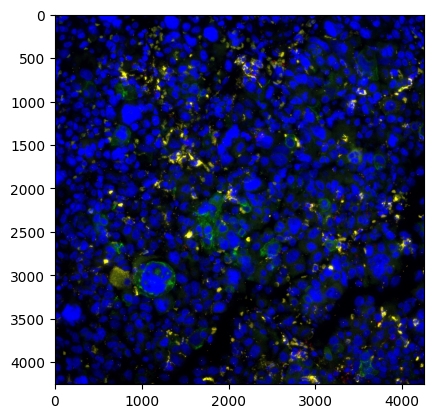

In [20]:
img_path = "data/cosMx_human_liver/LiverCancerFiles/CellStatsDir/CellComposite/CellComposite_F200.jpg"
show_image(img_path)

In [5]:
img_path = "data/cosMx_human_liver/LiverCancerFiles/CellStatsDir/Morphology2D_Normalized/20221008_005902_S3_C902_P99_N99_F200.TIF"
show_image(img_path)

(4256, 4256)


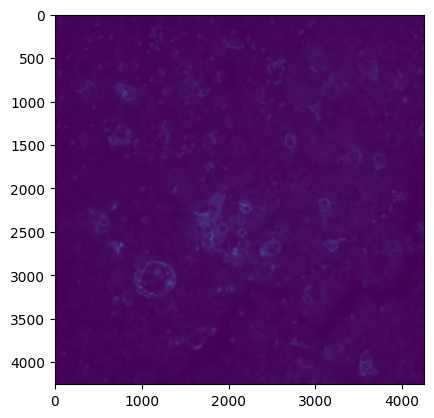

In [54]:
import cv2
img_path = "data/cosMx_human_liver/LiverCancerFiles/CellStatsDir/Morphology2D_Normalized/20221008_005902_S3_C902_P99_N99_F200.TIF"
image = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
print(image.shape)
plt.imshow(image)
plt.show()

(4256, 4256)


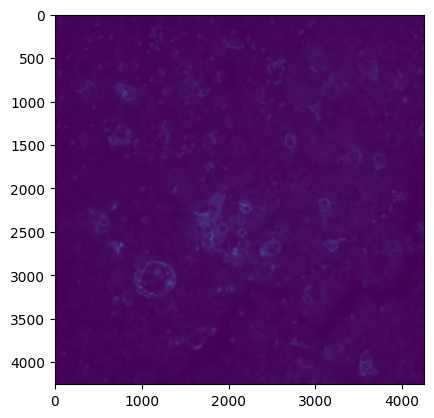

(4256, 4256)


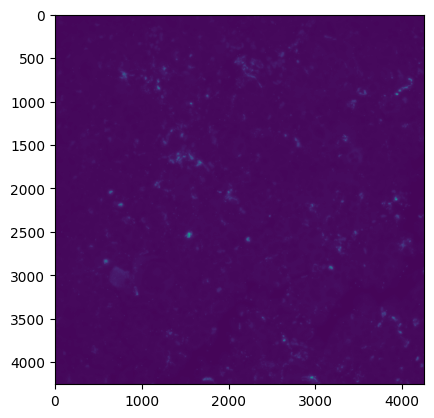

(4256, 4256)


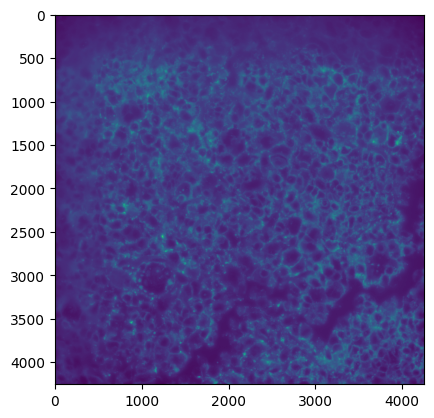

(4256, 4256)


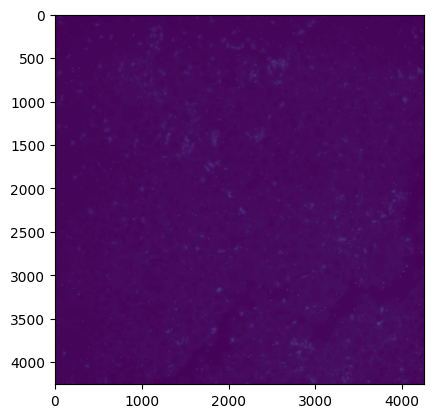

(4256, 4256)


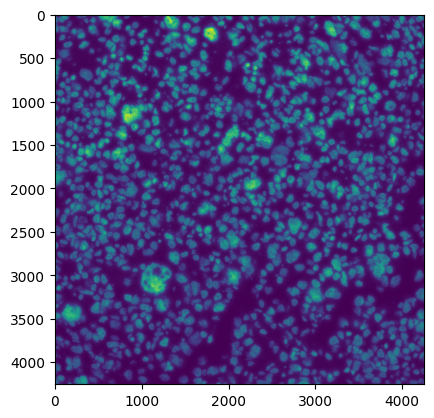

In [62]:
from PIL import Image, ImageSequence

# Open image and hunt down separate channels
with Image.open(img_path) as im:
    
    for ch in ImageSequence.Iterator(im):
        RGB = np.array(ch) #np.stack((np.array(ch), np.array(ch), np.array(ch)), axis=2)
        RGB = ((RGB - RGB.min()) / (RGB.max() - RGB.min())) * 255
        print(RGB.shape)
        plt.imshow(RGB)
        plt.show()
    #DAPI = im.copy()
    #im.seek(1)
    #G = im.copy()
    #im.seek(2)
    #B = im.copy()

(4256, 4256, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


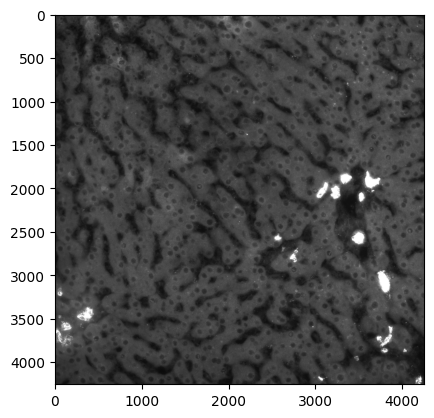

In [49]:
RGB = np.stack((np.array(DAPI), np.array(DAPI), np.array(DAPI)), axis=2)
print(RGB.shape)
plt.imshow(RGB)
plt.show()

In [35]:
import numpy as np
# Merge the three separate channels into single RGB image
RGB = Image.merge("RGB", (np.array(R), np.array(G), np.array(B)))
plt.imshow(RGB)
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'mode'

In [27]:
channels = cv2.split(image)[0]
channels.shape

(4256, 4256)

(4256, 4256)


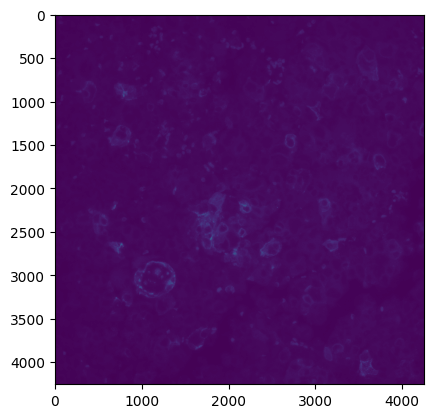

In [7]:

show_image(img_path)

In [ ]:
img_path = "data/cosMx_human_liver/LiverCancerFiles/CellStatsDir/Morphology2D_Normalized/20221008_005902_S3_C902_P99_N99_F200.TIF"
show_image(img_path)

In [ ]:
img_path = "data/cosMx_human_liver/LiverCancerFiles/CellStatsDir/Morphology3D/FOV200/20221008_005902_S3_C902_P99_N99_F200_Z001.TIF"
show_image(img_path)

(4256, 4256)


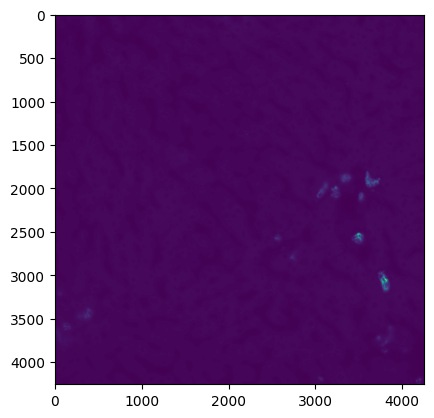

(4256, 4256)


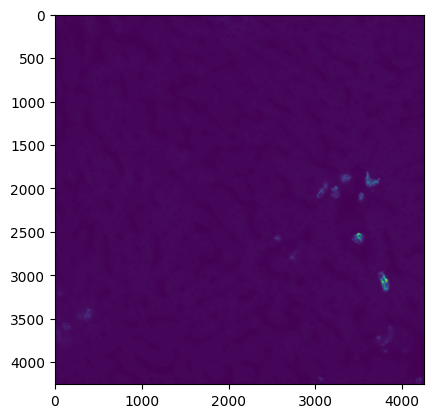

(4256, 4256)


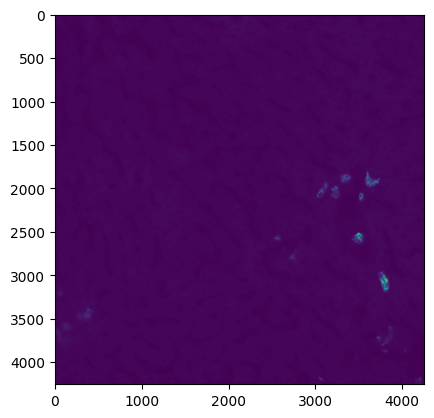

(4256, 4256)


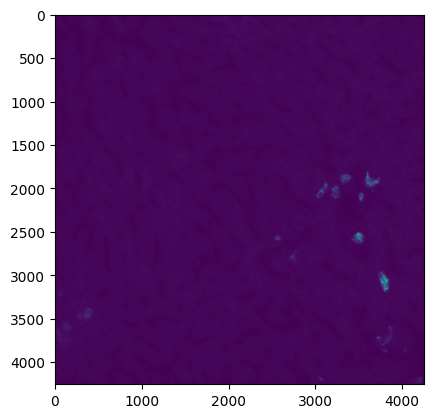

(4256, 4256)


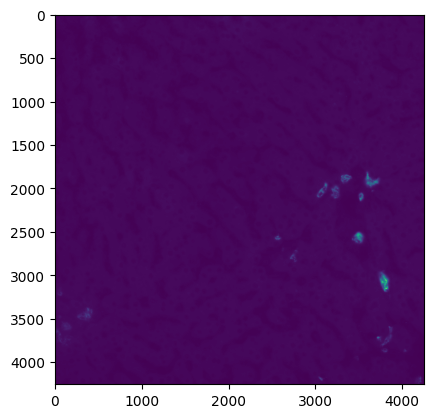

(4256, 4256)


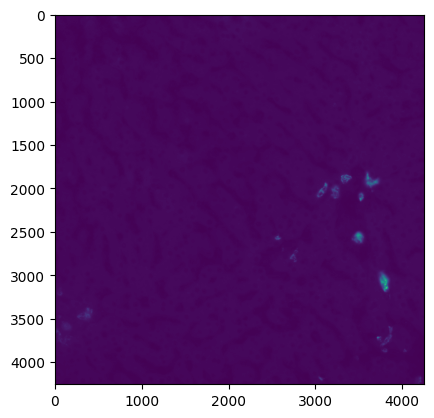

(4256, 4256)


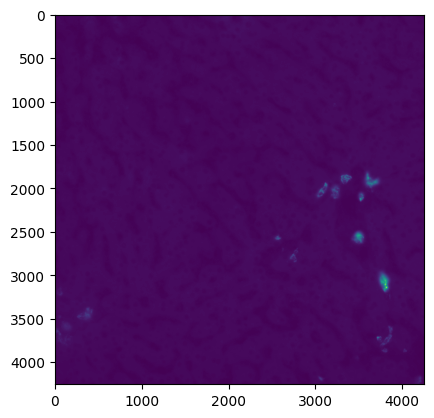

(4256, 4256)


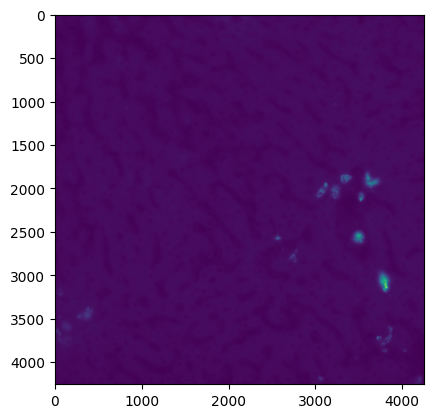

In [21]:
for i in range(1, 9):
    img_path = f"data/cosMx_human_liver/NormalLiverFiles/CellStatsDir/Morphology3D/FOV010/20221008_005902_S2_C902_P99_N99_F010_Z00{i}.TIF"
    show_image(img_path)

In [ ]:
img_path = "data/cosMx_human_liver/LiverCancerFiles/CellStatsDir/CellOverlay/CellOverlay_F200.jpg"
show_image(img_path)

In [ ]:
len(np.unique(glob.glob("data/cosMx_human_liver/LiverCancerFiles/CellStatsDir/CellComposite/CellComposite_*.jpg")))

In [ ]:
len(adata.obs.fov.unique())

In [ ]:
len(np.unique(glob.glob("data/cosMx_human_liver/NormalLiverFiles/CellStatsDir/CellComposite/CellComposite_*.jpg")))

In [ ]:
adata.obs.cellType.value_counts() / len(adata)

In [ ]:
adata.obs.cellType.value_counts() / len(adata)

In [ ]:
adata = adata[adata.obs.cellType != "NotDet",:]

In [ ]:
adata.obs.cellType = adata.obs.cellType.apply(lambda x: x.split(".")[0] if "Hep." in x else x)
adata.obs.cellType.value_counts()

In [ ]:
adata.obs.niche.value_counts()

In [ ]:
tab = adata.obs[["Run_Tissue_name", "fov", "niche"]].value_counts().reset_index().groupby(["Run_Tissue_name", "fov"]).count().reset_index()
tab

In [ ]:
tab.niche.plot.hist()

In [ ]:
normalLiver = adata[adata.obs.Run_Tissue_name == "NormalLiver",:]
normalLiver

In [ ]:
normalLiver.obs.cellType.value_counts() / len(normalLiver)

In [ ]:
normalLiver.obs["x_array"] = normalLiver.obs.x_slide_mm.rank(method="dense").astype(int)
normalLiver.obs["y_array"] = normalLiver.obs.y_slide_mm.rank(method="dense").astype(int)

In [ ]:
(p9.ggplot(normalLiver.obs, p9.aes("x_array", "y_array", color="cellType")) + p9.geom_point(size=0.1, alpha=0.5))

In [ ]:
nFov = dict(normalLiver.obs.fov.value_counts())
normalLiver.obs["nFov"] = normalLiver.obs.fov.apply(lambda x: nFov[x])
(p9.ggplot(normalLiver.obs, p9.aes("x_array", "y_array", color="nFov")) + p9.geom_point(size=1, alpha=1))

In [ ]:
split_adata = []
for fov in normalLiver.obs.fov.unique():
    if nFov[fov] > 1000:
        mini_adata = normalLiver[(normalLiver.obs.fov == fov).astype(bool),: ].copy()
        mini_adata.obs["x_array"] = mini_adata.obs.x_slide_mm.rank(method="dense").astype(int)
        mini_adata.obs["y_array"] = mini_adata.obs.y_slide_mm.rank(method="dense").astype(int)

        mini_adata.obs["x_pixel"] = mini_adata.obs["x_FOV_px"].astype(np.float32)
        mini_adata.obs["y_pixel"]= mini_adata.obs["y_FOV_px"].astype(np.float32)

        maxX = mini_adata.obs["x_pixel"].max() - pad_limit
        maxY = mini_adata.obs["y_pixel"].max() - pad_limit
        
        idx_bool = np.logical_and(np.logical_and(mini_adata.obs["x_pixel"] >= pad_limit, mini_adata.obs["x_pixel"] <= maxX),
                                 np.logical_and(mini_adata.obs["y_pixel"] >= pad_limit, mini_adata.obs["y_pixel"] <= maxY))
        mini_adata = mini_adata[idx_bool,:]

        clusters = mini_adata.obs.cellType.value_counts()[mini_adata.obs.cellType.value_counts() / len(mini_adata) >= 0.01].index.values
        mini_adata = mini_adata[mini_adata.obs.cellType.isin(clusters),:] # remove rare clusters 1% (noise)
        nCluster = mini_adata.obs.cellType.unique().size

        fov_str = str(fov)
        if len(fov_str) == 1:
            fov_str = f"00{fov_str}"
        elif len(fov_str) == 2:
            fov_str = f"0{fov_str}"
        if len(mini_adata) > 0 and nCluster >= 4:
            split_adata.append(mini_adata)
            mini_adata.write_h5ad(f"data/cosMx_human_liver/region_fov/N{fov}.h5ad")

            img_path = f"data/cosMx_human_liver/NormalLiverFiles/CellStatsDir/CellComposite/CellComposite_F{fov_str}.jpg"
            img_out_path = f"data/cosMx_human_liver/region_fov/N{fov}.jpg"
            shutil.copy(img_path, img_out_path)
            print(f"FOV: {fov_str}; N_cells:{len(mini_adata)}; Removed cells: {(~idx_bool).sum()}")
        else:
            print(f"Empty for: {fov_str} with nCluster: {nCluster}")
    else:
        print(f"LQ: {fov}")

In [ ]:
cancerousLiver = adata[adata.obs.Run_Tissue_name != "NormalLiver",:]
cancerousLiver

In [ ]:
cancerousLiver.obs.cellType.value_counts() / len(cancerousLiver)

In [ ]:
cancerousLiver.obs["x_array"] = cancerousLiver.obs.x_slide_mm.rank(method="dense").astype(int)
cancerousLiver.obs["y_array"] = cancerousLiver.obs.y_slide_mm.rank(method="dense").astype(int)

In [ ]:
(p9.ggplot(cancerousLiver.obs, p9.aes("x_array", "y_array", color="cellType")) + p9.geom_point(size=0.1, alpha=0.5))

In [ ]:
nFov = dict(cancerousLiver.obs.fov.value_counts())
cancerousLiver.obs["nFov"] = cancerousLiver.obs.fov.apply(lambda x: nFov[x])
(p9.ggplot(cancerousLiver.obs, p9.aes("x_array", "y_array", color="nFov")) + p9.geom_point(size=0.1, alpha=0.5))

In [ ]:
split_adata = []
for fov in cancerousLiver.obs.fov.unique():
    if nFov[fov] > 1000:
        mini_adata = cancerousLiver[(cancerousLiver.obs.fov == fov).astype(bool),: ].copy()
        mini_adata.obs["x_array"] = mini_adata.obs.x_slide_mm.rank(method="dense").astype(int)
        mini_adata.obs["y_array"] = mini_adata.obs.y_slide_mm.rank(method="dense").astype(int)

        mini_adata.obs["x_pixel"] = mini_adata.obs["x_FOV_px"].astype(np.float32)
        mini_adata.obs["y_pixel"]= mini_adata.obs["y_FOV_px"].astype(np.float32)

        maxX = mini_adata.obs["x_pixel"].max() - pad_limit
        maxY = mini_adata.obs["y_pixel"].max() - pad_limit

        idx_bool = np.logical_and(np.logical_and(mini_adata.obs["x_pixel"] >= pad_limit, mini_adata.obs["x_pixel"] <= maxX),
                                 np.logical_and(mini_adata.obs["y_pixel"] >= pad_limit, mini_adata.obs["y_pixel"] <= maxY))
        mini_adata = mini_adata[idx_bool,:]

        clusters = mini_adata.obs.cellType.value_counts()[mini_adata.obs.cellType.value_counts() / len(mini_adata) >= 0.01].index.values
        mini_adata = mini_adata[mini_adata.obs.cellType.isin(clusters),:] # remove rare clusters 1% (noise)
        nCluster = mini_adata.obs.cellType.unique().size

        fov_str = str(fov)
        if len(fov_str) == 1:
            fov_str = f"00{fov_str}"
        elif len(fov_str) == 2:
            fov_str = f"0{fov_str}"
        if len(mini_adata) > 0 and nCluster >= 4:
            split_adata.append(mini_adata)
            mini_adata.write_h5ad(f"data/cosMx_human_liver/region_fov/C{fov}.h5ad")

            img_path = f"data/cosMx_human_liver/LiverCancerFiles/CellStatsDir/CellComposite/CellComposite_F{fov_str}.jpg"
            img_out_path = f"data/cosMx_human_liver/region_fov/C{fov}.jpg"
            shutil.copy(img_path, img_out_path)
            print(f"FOV: {fov_str}; N_cells:{len(mini_adata)}; Removed cells: {(~idx_bool).sum()}")
            
        else:
            print(f"Empty for: {fov_str} with nCluster: {nCluster}")
            
    else:
        print(f"LQ {fov}")
    

In [ ]:
nComb = 25

In [ ]:
files = glob.glob("data/cosMx_human_liver/region_fov/C*.jpg")
files = [f.split("/")[-1].split(".")[0] for f in files]
np.random.shuffle(files)
files = files[:nComb]
files[:2]

In [ ]:
fov = [int(f[1:]) for f in files]

In [ ]:
(p9.ggplot(cancerousLiver.obs[cancerousLiver.obs.fov.astype(int).isin(fov)], p9.aes("x_array", "y_array", color="niche")) + p9.geom_point(size=0.1, alpha=0.5))

In [ ]:
(p9.ggplot(cancerousLiver.obs[cancerousLiver.obs.fov.astype(int).isin(fov)], p9.aes("x_array", "y_array", color="cellType")) + p9.geom_point(size=0.1, alpha=0.5))

In [ ]:
for f in files:
    print(f"- {f}")

In [ ]:
import itertools
combinations = list(itertools.combinations(files, 5))
np.random.shuffle(combinations)
len(combinations)

In [ ]:
for f in files:
    for comb in combinations:
        comb = list(comb)
        comb = str(comb)
        if f not in comb:
            print(f"- [['{f}'], {comb}]")
            combinations = [c for c in combinations if str(list(c)) != comb]
            break
len(combinations)